# **`pycoco`** calling **`CoCo`**

___

## Introduction

---
**`pycoco.coco_calls`**

In [7]:
try:
    from importlib import reload
except:
    pass

# %matplotlib inline
%matplotlib notebook

from matplotlib import pyplot as plt

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

# Run Light Curve Fits
___
## Individual SNe
First test

In [8]:
snname = "SN2006aj"
pcc.coco.run_LCfit(snname)

/Users/berto/anaconda3/envs/pycoco/lib/python3.6/site-packages/pycoco/utils.py:213: UserWarning: /Users/berto/Code/verbose-enigma/notebooks/Tutorials/SN2006aj is not a valid file. Returning 'False'.
  " is not a valid file. Returning 'False'.")


current list.txt is up to date. re run with force = True to force.
No Model supplied - running with default
Running CoCo lcfit on SN2006aj
callargs are  ['/Users/berto/Code/CoCo/lcfit', 'SN2006aj']
Fit complete


Then run

In [3]:
pcc.coco.run_LCfit(os.path.join(pcc.defaults._default_data_dir_path, "lc/"+snname+".dat"))

current list.txt is up to date. re run with force = True to force.
No Model supplied - running with default
Running CoCo lcfit on /Users/berto/Code/CoCo/data/lc/SN2006aj.dat
callargs are  ['/Users/berto/Code/CoCo/lcfit', '/Users/berto/Code/CoCo/data/lc/SN2006aj.dat']
Fit complete


<IPython.core.display.Javascript object>


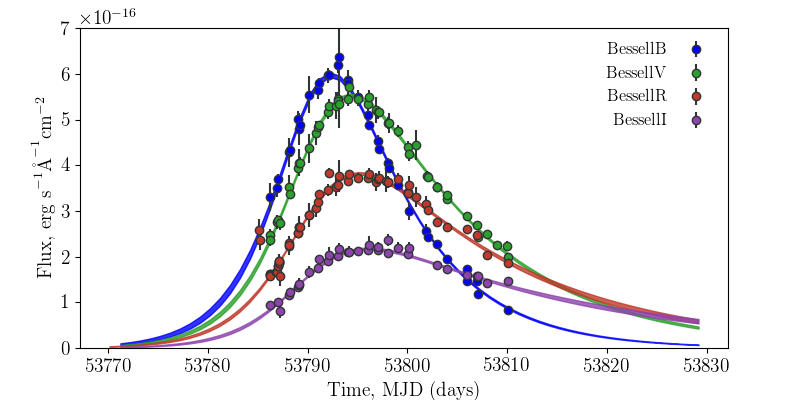

In [4]:
sn = pcc.classes.SNClass(snname)
sn.load_phot(verbose=False)
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))

sn.plot_lc(multiplot=False)

In [5]:
pcc.coco.run_LCfit(os.path.join(pcc.defaults._default_data_dir_path, "lc/"+snname+".dat"), model="Karpenka12")

current list.txt is up to date. re run with force = True to force.
running with Karpenka12
Running CoCo lcfit on /Users/berto/Code/CoCo/data/lc/SN2006aj.dat
callargs are  ['/Users/berto/Code/CoCo/lcfit', '/Users/berto/Code/CoCo/data/lc/SN2006aj.dat', '-m', 'Karpenka12']
Fit complete


<IPython.core.display.Javascript object>


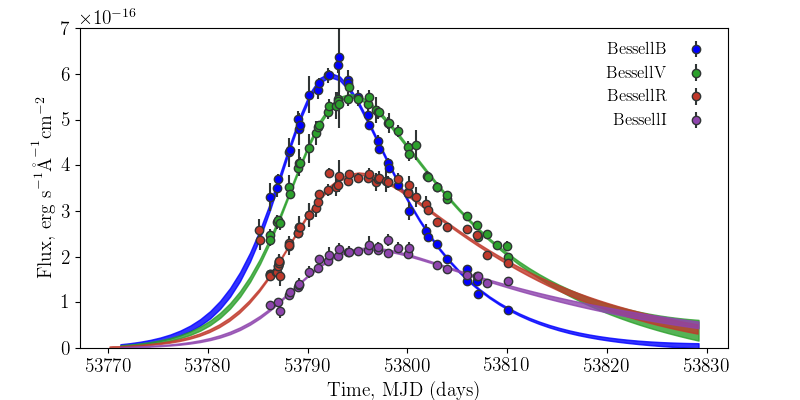

In [6]:
sn = pcc.classes.SNClass(snname)
sn.load_phot(verbose=False)
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))

sn.plot_lc(multiplot=False)

## Model Choice
----
You can also pass a model to **`CoCo lcfit`**, this is possible through **`pycoco`** using the `model` arg. This will only take models that are defined in CoCo/src/models and match the filenames. So, currently the valid models are:

In [9]:
models = np.unique([i.split(".")[0] for i in os.listdir(os.path.join(pcc.defaults._default_coco_dir_path, "src/models"))])
models

array(['Bazin09', 'Firth17Complex', 'Karpenka12', 'Karpenka12Afterglow',
       'Kessler10', 'LinearMangle', 'SpecMangle'],
      dtype='<U19')

In [10]:
model_name = "Karpenka12"
# model_name = "Karpenka12Afterglow"
# model_name = "Kessler10"
pcc.coco.run_LCfit(os.path.join(pcc.defaults._default_data_dir_path, "lc/"+snname+".dat"), model=model_name, verbose=True)

current list.txt is up to date. re run with force = True to force.
running with Karpenka12
Running CoCo lcfit on /Users/berto/Code/CoCo/data/lc/SN2006aj.dat
callargs are  ['/Users/berto/Code/CoCo/lcfit', '/Users/berto/Code/CoCo/data/lc/SN2006aj.dat', '-m', 'Karpenka12']
Fit complete


<IPython.core.display.Javascript object>


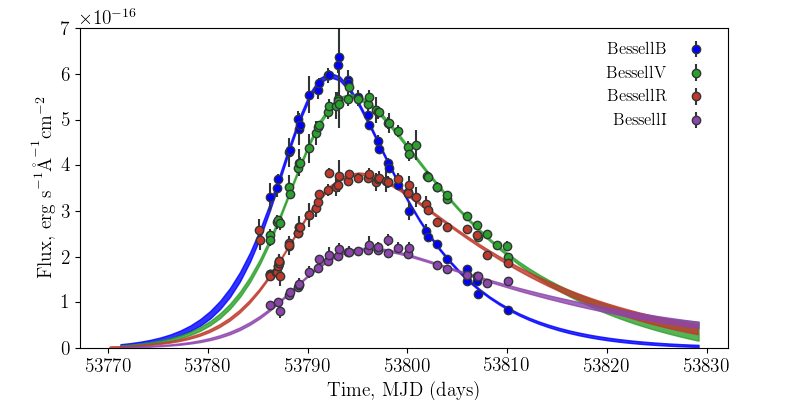

In [11]:
sn = pcc.classes.SNClass(snname)
sn.load_phot(verbose=False)
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))

sn.plot_lc(multiplot=False)

## All SNe as Batch
___

In [ ]:
pcc.coco.run_LCfit_fileinput(os.path.join(pcc.defaults._default_coco_dir_path, "examples/lc.list"))
print("Done.")

In [ ]:
reload(pcc) ## FOR DEV
reload(pcc.classes)
reload(pcc.defaults) ## FOR DEV

## Call Specfit
---

### individual speclists

In [ ]:
pcc.coco.get_all_spec_lists()

In [ ]:
# pcc.coco.run_specfit('/Users/berto/Code/CoCo/lists/SN2013ge.list')
pcc.coco.run_specfit(sn)

## All Speclists
___

In [ ]:
pcc.coco.specfit_all()

# Specphase

In [ ]:
phase_path = os.path.join(pcc.defaults._default_coco_dir_path, "examples/phase.list")
pcc.coco.run_specphase("BessellV", phase_path)

In [ ]:
pcc.coco.run_specphase("BessellV", phase_path, model="Foo")

In [ ]:
pcc.coco.run_specphase("BessellV", phase_path, model="Bazin09")